the python version is 3.7.10


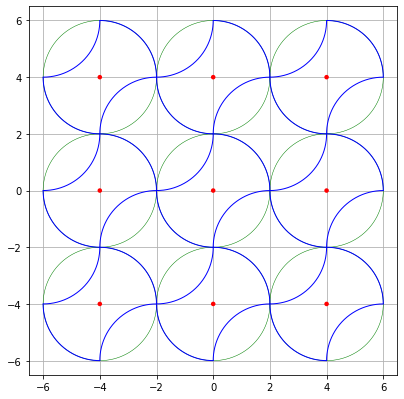

In [1]:
# 刺子繡 (Sashiko)：日本鄉村的編織幾何學
# https://mp.weixin.qq.com/s/IqHrsxpgEy9LYoWw2BU9VQ?fbclid=IwAR3KQDGZjJqi5dCT3ZrqEGaMTMkdYeK21SnuQ5yR05eJCWMuXF1xwAF7Prk
#
# (home)/00-Sashiko/
# Sashiko-student-final
# 2021-09-07
#
# python 3.8.10
# run on replit.com
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is',python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(13, 13)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-tup7[6]/2, tup7[6]/2)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-tup7[6]/2, tup7[6]/2)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-6,-4,-2,0,2,4,6]
yvalues = [-6,-4,-2,0,2,4,6]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=10)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
plt.savefig("./png/1-00.png",format="png",dpi=150)
#
cxy = (0,0)
r0 = 0.08
r1 = 2
cir_0 = shapely_Arc(cxy, r0,  0, 360)
cir_1 = shapely_Arc(cxy, r1,  0, 360)
#
motif_fill(cir_0, 'red',   10, 1.0)   
motif_line(cir_1, 'green', 10, 0.5) 
#
plt.savefig("./png/1-01.png",format="png",dpi=150)
#
for posi in ((4,0), (4,4), (0,4), (-4,4), (-4,0), (-4,-4), (0,-4), (4,-4)) : 
    motif_0 = affinity.translate(cir_0, posi[0], posi[1], 0)
    motif_1 = affinity.translate(cir_1, posi[0], posi[1], 0)
    motif_fill(motif_0, 'red',   10, 1.0) 
    motif_line(motif_1, 'green', 10, 0.5) 
# end for
#
plt.savefig("./png/1-02.png",format="png",dpi=150)
#
arc_2 = shapely_Arc(cxy,    r1,  0, 90)
motif_line(arc_2, 'blue',  20, 1.0)
#
plt.savefig("./png/1-03-1.png",format="png",dpi=150)
#
arc_3 = shapely_Arc((-2,2), r1,270,360)
arc_4 = shapely_Arc(cxy,    r1,180,270)
arc_5 = shapely_Arc((2,-2), r1, 90,180)
#
motif_line(arc_3, 'blue',  20, 1.0)
motif_line(arc_4, 'blue',  20, 1.0)
motif_line(arc_5, 'blue',  20, 1.0)
#
plt.savefig("./png/1-03-2.png",format="png",dpi=150)
#
for posi in ((4,0), (4,4), (0,4), (-4,4), (-4,0), (-4,-4), (0,-4), (4,-4)) : 
    motif_2 = affinity.translate(arc_2, posi[0], posi[1], 0)
    motif_3 = affinity.translate(arc_3, posi[0], posi[1], 0)
    motif_4 = affinity.translate(arc_4, posi[0], posi[1], 0)
    motif_5 = affinity.translate(arc_5, posi[0], posi[1], 0)
    #
    motif_line(motif_2, 'blue',  20, 1.0) 
    motif_line(motif_3, 'blue',  20, 1.0) 
    motif_line(motif_4, 'blue',  20, 1.0) 
    motif_line(motif_5, 'blue',  20, 1.0) 
# end for
#
plt.savefig("./png/1-04.png",format="png",dpi=150)
#